<a href="https://colab.research.google.com/github/niraj8763/Deep-Learning/blob/master/Classifying_newswires_a_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Reuters dataset

## Loading the Reuters dataset

In [1]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [6]:
train_labels[10]

3

## Preparing the data

### Encoding the data

In [0]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] =1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for i , label in enumerate(labels):
    results[i,label] = 1.
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building your network

### Model definition

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

## Compiling the model

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## Setting aside a validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

##  Training the model

In [21]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.5080 - accuracy: 0.5423 - val_loss: 1.6506 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 114us/step - loss: 1.3511 - accuracy: 0.7098 - val_loss: 1.2777 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.0211 - accuracy: 0.7774 - val_loss: 1.1508 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.8165 - accuracy: 0.8241 - val_loss: 1.0433 - val_accuracy: 0.7680
Epoch 5/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.6491 - accuracy: 0.8608 - val_loss: 0.9795 - val_accuracy: 0.7780
Epoch 6/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.5267 - accuracy: 0.8847 - val_loss: 0.9363 - val_accuracy: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 115us/step - loss

## Plotting the training and validation loss

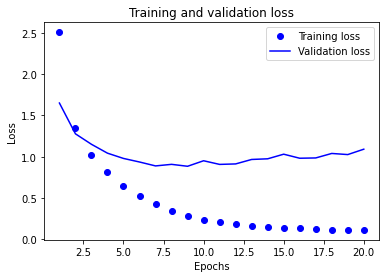

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##  Plotting the training and validation accuracy

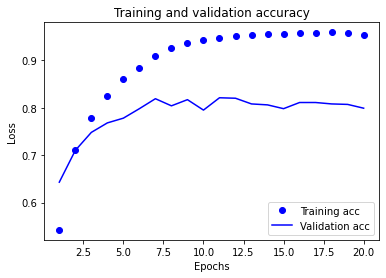

In [23]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining a model from scratch

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [26]:
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 120us/step - loss: 2.5985 - accuracy: 0.5080 - val_loss: 1.7568 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 1s 111us/step - loss: 1.4167 - accuracy: 0.7056 - val_loss: 1.2966 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 109us/step - loss: 1.0276 - accuracy: 0.7845 - val_loss: 1.1128 - val_accuracy: 0.7650
Epoch 4/9
7982/7982 [==============================] - 1s 113us/step - loss: 0.8032 - accuracy: 0.8305 - val_loss: 1.0215 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.6436 - accuracy: 0.8632 - val_loss: 0.9565 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 1s 111us/step - loss: 0.5200 - accuracy: 0.8896 - val_loss: 0.9132 - val_accuracy: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 110us/step - loss: 0.414

In [27]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 79us/step


In [28]:
results

[0.9937052936927612, 0.7849510312080383]

In [29]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1981300089047195

## Generating predictions for new data

In [0]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

1.0

In [33]:
 np.argmax(predictions[0])

3